In [1]:
%matplotlib inline
import os

In [2]:
from utils import *
# get_batches, get_data, plots, plot_confusion_matrix

Using TensorFlow backend.
/Users/larry/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
path = "data/dogscats/sample/"
train_path = f'{path}train/'
valid_path = f'{path}valid/'

model_path = f'{path}models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [4]:
from vgg16 import Vgg16

In [5]:
# 已經訓練好的 vgg16 模型
vgg = Vgg16()

In [6]:
# vgg16 可以分類 1000 種
len(vgg.classes)

1000

In [7]:
batch_size = 4

In [8]:
batches = get_batches(train_path, batch_size=batch_size)
val_batches = get_batches(valid_path, batch_size=batch_size)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [9]:
# batches 是 Iterator, 可以用 next 取得 batch_size 筆資料 
type(batches)

keras.preprocessing.image.DirectoryIterator

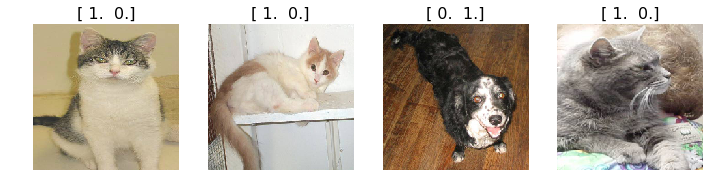

In [10]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [11]:
# 修改 vgg16
# 原先的 vgg16 可以辨識 1000 種，finetune 之後，改成想要分類的數量
vgg.finetune(batches)

In [12]:
# 目前的架構是要辨識貓和狗
vgg.classes

['cats', 'dogs']

In [13]:
# 開始訓練
vgg.fit(batches, val_batches, epochs=1)

Epoch 1/1
160/160 [==============================] - 715s 4s/step - loss: 0.5797 - acc: 0.8094 - val_loss: 0.6294 - val_acc: 0.8250


In [27]:
test_imgs, test_labels = next(val_batches)

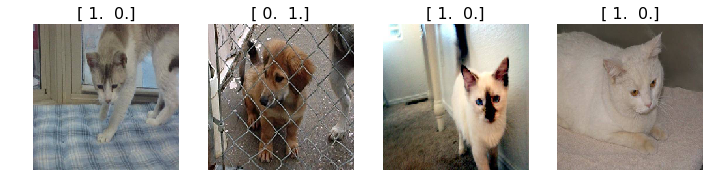

In [28]:
plots(test_imgs, titles=test_labels)

In [29]:
# valid/ 裏的圖片 vgg 在訓練時沒有看過
vgg.predict(test_imgs)

(array([ 0.9985,  0.9635,  0.9257,  0.8435], dtype=float32),
 array([1, 1, 0, 0]),
 ['dogs', 'dogs', 'cats', 'cats'])

In [ ]:
# 這次預測 1 個錯誤，3 個正確